<a href="https://colab.research.google.com/github/Mukeshvudayagiri/keep-coding-python/blob/main/Projects/Page_View_Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Page View Time Series Visualizer Project 


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

#import csv 

df = pd.read_csv('/content/sample_data/fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
df.head()
# df.value.count()

,value
date,
2016-09-05,1201
2016-10-05,2329
2016-11-05,1716
2016-12-05,10539
2016-05-13,6933


In [2]:
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

df = df[
                  (df['value'] >= df['value'].quantile(0.025)) & 
                  (df['value'] <= df['value'].quantile(0.975))]
# df.value.count()
df



,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0, 0.5, 'Page Views')

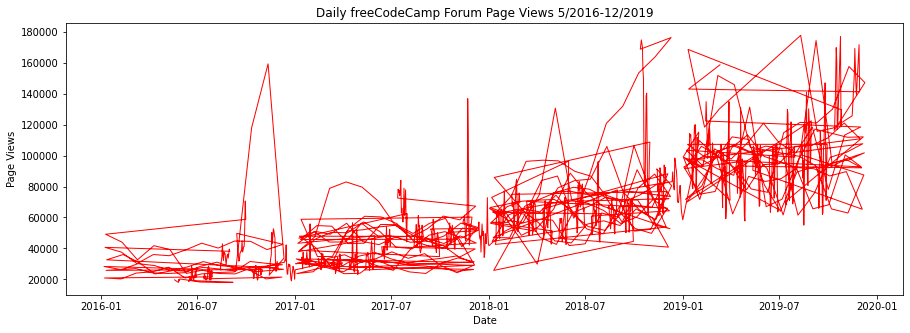

In [3]:
#Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
# The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". 
# The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(df.index, df['value'], 'r', linewidth = 1)

ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

In [8]:
# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png".
#  It should show average daily page views for each month grouped by year. 
#  The legend should show month labels and have a title of "Months". On the chart, the label 
# on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

df['month'] = df.index.month
df['year'] = df.index.year

df_group = df.groupby(['year', 'month'])['value'].mean()
# df_group = df.groupby(['year', 'month'], as_index = False)['value'].mean()
df_group = df_group.unstack()
df_group



month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,32954.833333,31838.333333,29222.833333,29929.666667,24993.545455,23758.727273,24558.652174,32791.576923,38499.600000,29471.720000,40226.458333,27874.400000
2017,35360.096774,34740.214286,34302.548387,36625.333333,38596.741935,43772.166667,58529.451613,44904.516129,44812.533333,45289.483871,54077.900000,45756.870968
2018,57866.193548,65091.962963,62594.483871,61587.933333,64467.000000,69043.566667,65649.064516,67390.032258,66101.366667,100171.344828,77890.400000,78255.838710
2019,102582.290323,102123.481481,98937.322581,91769.000000,96874.413793,89267.320000,94134.607143,103596.266667,100070.896552,115110.200000,123875.388889,103512.500000


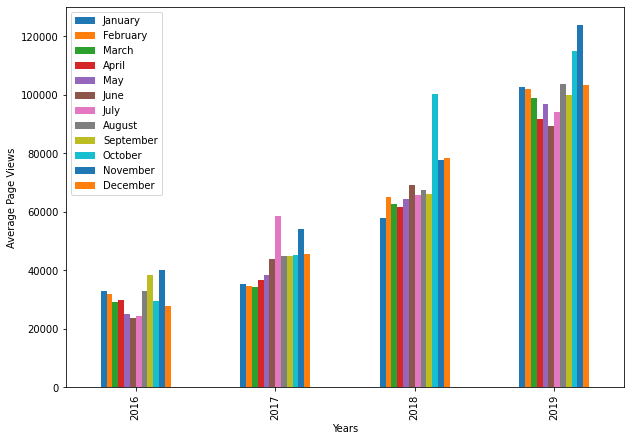

In [9]:
box_plot = df_group.plot.bar(legend=True, figsize=(10,7), xlabel='Years', ylabel= 'Average Page Views' )
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [43]:
# Create a draw_box_plot function that uses Searborn

df_box = df.copy()
df_box
df_box.reset_index(inplace=True)
df_box
# df_box=df_box.sort_values('month')
# df_box
df_box['year'] = [d.year for d in df_box.date]
df_box
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box
df_box=df_box.sort_values('month')
df_box

,date,value,month,year
573,2018-04-01,58910,Apr,2018
1036,2019-04-15,92015,Apr,2019
1037,2019-04-16,98066,Apr,2019
1038,2019-04-17,100099,Apr,2019
1039,2019-04-18,86821,Apr,2019
...,...,...,...,...
463,2017-09-16,42710,Sep,2017
121,2016-09-10,23573,Sep,2016
1147,2019-09-08,93534,Sep,2019
460,2017-09-13,52552,Sep,2017


In [27]:
df_box['month_num'] = df_box['date'].dt.month
df_box

,date,value,month,year,month_num
0,2016-05-19,19736,May,2016,5
1,2016-05-26,18060,May,2016,5
2,2016-05-27,19997,May,2016,5
3,2016-05-28,19044,May,2016,5
4,2016-05-29,20325,May,2016,5
...,...,...,...,...,...
1233,2019-11-24,138875,Nov,2019,11
1234,2019-11-29,171584,Nov,2019,11
1235,2019-11-30,141161,Nov,2019,11
1236,2019-01-12,142918,Jan,2019,1


In [30]:
df_box = df_box.sort_values('month_num')
df_box 

,date,value,month,year,month_num
228,2017-01-24,33083,Jan,2017,1
222,2017-01-18,30628,Jan,2017,1
961,2019-01-30,106844,Jan,2019,1
962,2019-01-31,115145,Jan,2019,1
600,2018-01-31,61732,Jan,2018,1
...,...,...,...,...,...
192,2016-12-19,28247,Dec,2016,12
63,2016-12-08,29488,Dec,2016,12
640,2018-12-03,66045,Dec,2018,12
921,2018-12-21,85083,Dec,2018,12


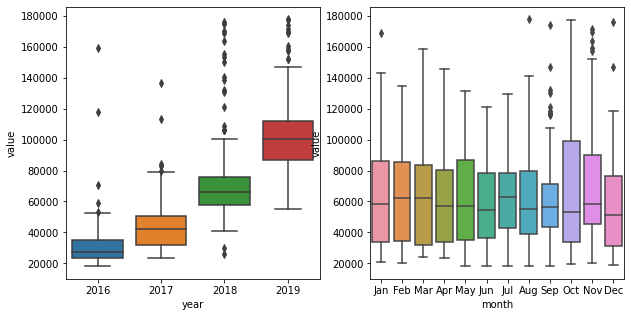

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=ax[0])
ax[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax = ax[1])